In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
with open("inputoutput-H.csv") as file:
    reader = csv.reader(file, delimiter=",")

In [3]:
np.arange(0, 5)

array([0, 1, 2, 3, 4])

In [4]:
data = np.loadtxt("inputoutput-H.csv", delimiter=",", usecols=np.arange(0, 114))
dataO = np.loadtxt("inputoutput-O.csv", delimiter=",", usecols=np.arange(0, 114))
datae = np.loadtxt("inputoutput-e.csv", delimiter=",", usecols=np.arange(0, 114))

In [5]:
data = data[data[:, 10] > 1.0]
dataO = dataO[dataO[:, 10] > 1.0]
datae = datae[datae[:, 10] > 1.0]

In [6]:
data.shape

(200, 114)

In [7]:
dataO.shape

(200, 114)

<IPython.core.display.Javascript object>


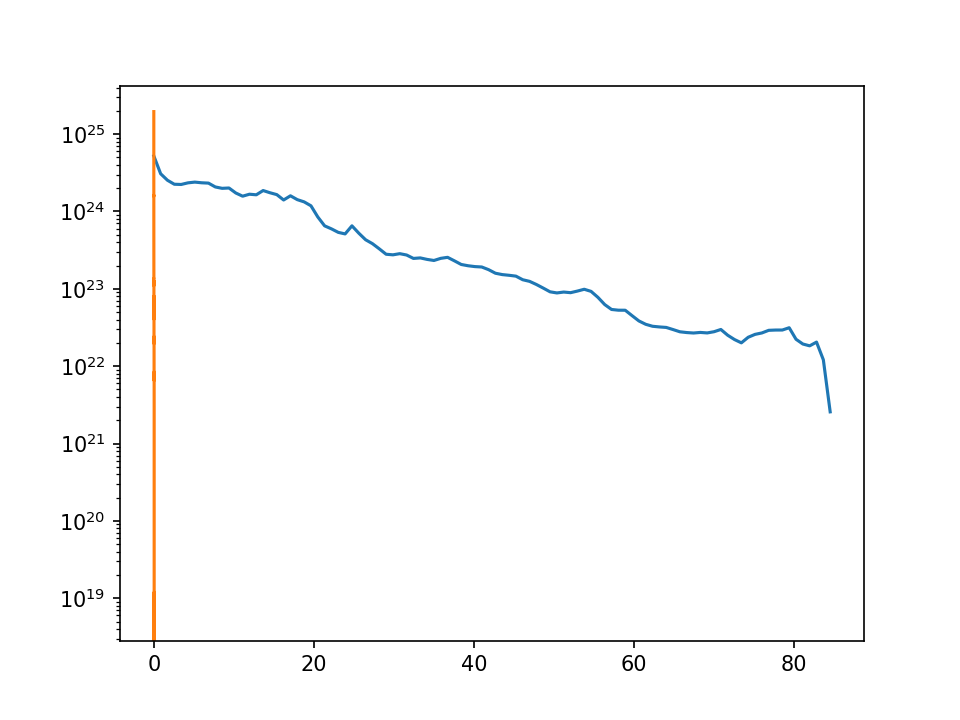

<function matplotlib.pyplot.show(block=None)>

In [8]:
x = np.linspace(0, 1, 100)

plt.figure(dpi=150)
plt.plot(x * data[12, -1], np.exp(data[12, 13:-1]))
# plt.plot(x*dataO[5,-1]/8, np.exp(dataO[5,13:-1]))
plt.yscale("log")
plt.show

In [9]:
def f(index):
    x = np.linspace(0, 1, 100)
    return x * data[index, -1], np.exp(data[index, 13:-1])


plt.plot(f(2)[0], f(2)[1])

<IPython.core.display.Javascript object>


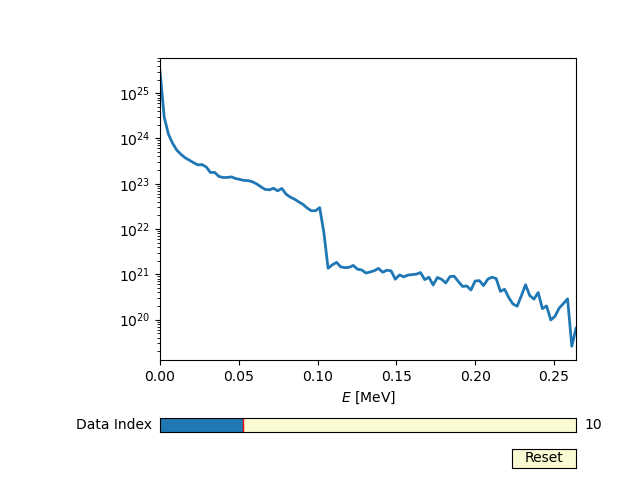

0

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(index):
    return x * data[index, -1], np.exp(data[index, 13:-1])


t = np.linspace(0, 1, 1000)
x = np.linspace(0, 1, 100)

# Define initial parameters
init_amplitude = 5
init_frequency = 3
init_index = 10

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
(line,) = plt.plot(f(init_index)[0], f(init_index)[1], lw=2)
plt.yscale("log")
ax.set_xlabel("$E$ [MeV]")

axcolor = "lightgoldenrodyellow"
ax.margins(x=0)

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
freq_slider = Slider(
    ax=axfreq,
    label="Data Index",
    valmin=0,
    valmax=50,
    valinit=init_index,
    valfmt="%0.0f",
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_xdata(f(int(freq_slider.val))[0])
    line.set_ydata(f(int(freq_slider.val))[1])
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, "Reset", color=axcolor, hovercolor="0.975")


def reset(event):
    freq_slider.reset()


button.on_clicked(reset)

# plt.show()

<IPython.core.display.Javascript object>


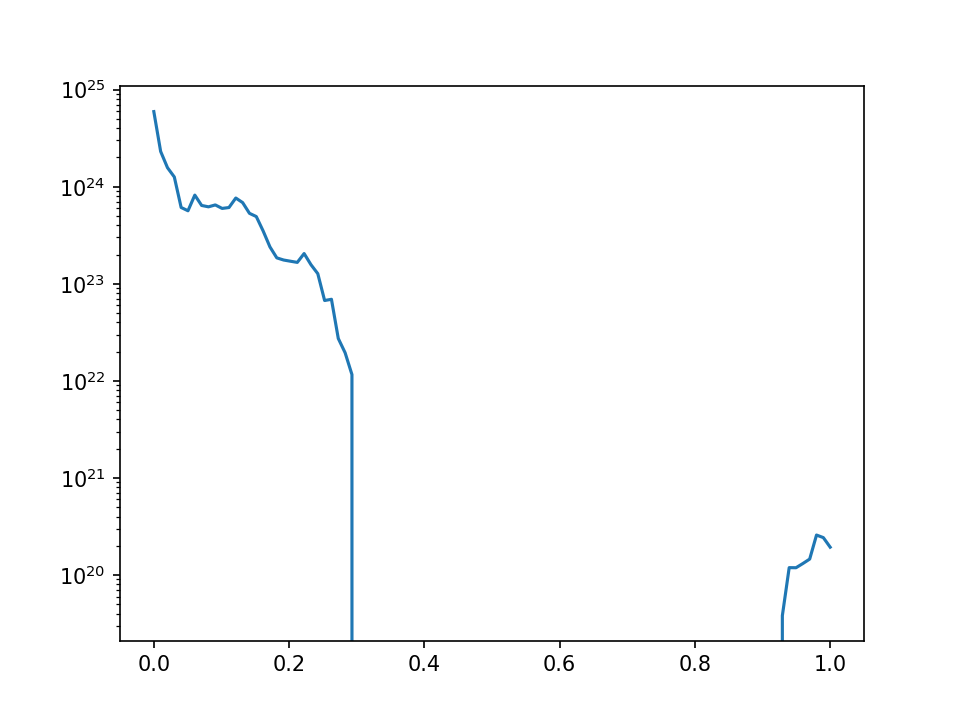

<function matplotlib.pyplot.show(block=None)>

In [11]:
x = np.linspace(0, 1, 100)

plt.figure(dpi=150)
plt.plot(x, np.exp(dataO[5, 13:-1]))
plt.yscale("log")
plt.show

<IPython.core.display.Javascript object>


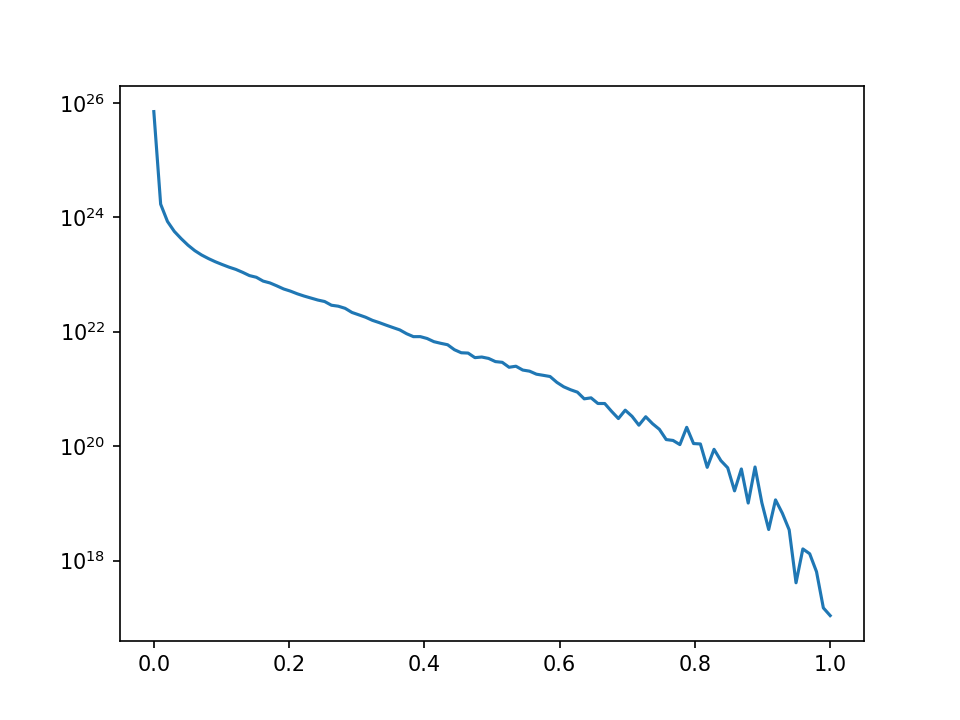

<function matplotlib.pyplot.show(block=None)>

In [12]:
x = np.linspace(0, 1, 100)

plt.figure(dpi=150)
plt.plot(x, np.exp(datae[6, 13:-1]))
plt.yscale("log")
plt.show

In [13]:
def aErelation(n, data):
    print(
        "a0=",
        data[n, 10],
        ", E_Max=",
        data[n, -1],
        " MeV, FWHM=",
        data[n, 1],
        "m, Theta=",
        data[n, 4],
        "° , Pol:",
        data[n, 3],
    )

In [14]:
for n in range(0, 20):
    aErelation(n, data)

a0= 5.025645599187355 , E_Max= 0.03657714221047614  MeV, FWHM= 2e-06 m, Theta= 1.9514088281184583 ° , Pol: 1.0
a0= 11.055853809655453 , E_Max= 0.30315612670836156  MeV, FWHM= 2e-06 m, Theta= 7.846062051679704 ° , Pol: 1.0
a0= 30.680332472678394 , E_Max= 0.046781022593507235  MeV, FWHM= 2e-06 m, Theta= 4.210186834599112 ° , Pol: 0.0
a0= 29.770462365390927 , E_Max= 1.2711245943129614  MeV, FWHM= 2e-06 m, Theta= 8.475007526666552 ° , Pol: 0.0
a0= 22.44818615527966 , E_Max= 0.03614514599597987  MeV, FWHM= 2e-06 m, Theta= 1.920091006930379 ° , Pol: 0.0
a0= 30.581356274164218 , E_Max= 55.4084461471586  MeV, FWHM= 2e-06 m, Theta= 3.307355380354627 ° , Pol: 0.0
a0= 3.307889563550562 , E_Max= 0.04270947775933552  MeV, FWHM= 2e-06 m, Theta= 1.399834141520756 ° , Pol: 1.0
a0= 1.318676683476296 , E_Max= 0.03917815710348029  MeV, FWHM= 2e-06 m, Theta= 8.50010369884654 ° , Pol: 0.0
a0= 1.7681119857181207 , E_Max= 0.04020548411627953  MeV, FWHM= 2e-06 m, Theta= 9.922377791021011 ° , Pol: 0.0
a0= 30.5

In [15]:
for n in range(0, 7):
    aErelation(n, dataO)

a0= 5.025645599187355 , E_Max= 0.24963140734596131  MeV, FWHM= 2e-06 m, Theta= 1.9514088281184583 ° , Pol: 1.0
a0= 11.055853809655453 , E_Max= 1.7371737933293114  MeV, FWHM= 2e-06 m, Theta= 7.846062051679704 ° , Pol: 1.0
a0= 30.680332472678394 , E_Max= 0.29889976929652023  MeV, FWHM= 2e-06 m, Theta= 4.210186834599112 ° , Pol: 0.0
a0= 29.770462365390927 , E_Max= 7.663859873934839  MeV, FWHM= 2e-06 m, Theta= 8.475007526666552 ° , Pol: 0.0
a0= 22.44818615527966 , E_Max= 0.24053938266089575  MeV, FWHM= 2e-06 m, Theta= 1.920091006930379 ° , Pol: 0.0
a0= 30.581356274164218 , E_Max= 158.55685548267314  MeV, FWHM= 2e-06 m, Theta= 3.307355380354627 ° , Pol: 0.0
a0= 3.307889563550562 , E_Max= 0.3019395375484469  MeV, FWHM= 2e-06 m, Theta= 1.399834141520756 ° , Pol: 1.0


In [16]:
data[6]

array([8.31526599e-02, 2.00000000e-06, 3.91632882e-14, 1.00000000e+00,
       1.39983414e+00, 8.00000000e-07, 6.00000000e-07, 9.22124864e+01,
       1.57079633e+01, 3.05160622e+00, 3.30788956e+00, 9.07626558e-04,
       1.80153296e-03, 5.84397016e+01, 5.59305028e+01, 5.58713748e+01,
       5.46290173e+01, 5.44858246e+01, 5.49050977e+01, 5.46415131e+01,
       5.35227017e+01, 5.33245183e+01, 5.21420088e+01, 5.15541143e+01,
       5.14271755e+01, 5.13437339e+01, 5.12532005e+01, 5.11780543e+01,
       5.11317656e+01, 5.10782239e+01, 5.10608632e+01, 5.09742130e+01,
       5.09394498e+01, 5.08923643e+01, 5.08605356e+01, 5.08385331e+01,
       5.07958083e+01, 5.07645490e+01, 5.07399304e+01, 5.06795849e+01,
       5.06372603e+01, 5.06270479e+01, 5.06110832e+01, 5.05837586e+01,
       5.05588537e+01, 5.05638348e+01, 5.05129383e+01, 5.04854041e+01,
       5.04852245e+01, 5.04829860e+01, 5.04615277e+01, 5.04357081e+01,
       5.04927073e+01, 5.04309337e+01, 5.03717565e+01, 5.04072747e+01,
      

In [17]:
aErelation(0, data)

a0= 5.025645599187355 , E_Max= 0.03657714221047614  MeV, FWHM= 2e-06 m, Theta= 1.9514088281184583 ° , Pol: 1.0


In [18]:
H_Emax = np.amax(data[:, -1])
H_Emax

171.1001870299686

In [19]:
data[(data[:, 10] > 19.5) & (data[:, 10] < 20.5) & (data[:, 4] < 1)][:, -1]

array([], dtype=float64)

In [20]:
np.where(data[:, -1] == H_Emax)

(array([91], dtype=int64),)

In [21]:
aErelation(0, data)

a0= 5.025645599187355 , E_Max= 0.03657714221047614  MeV, FWHM= 2e-06 m, Theta= 1.9514088281184583 ° , Pol: 1.0


<IPython.core.display.Javascript object>


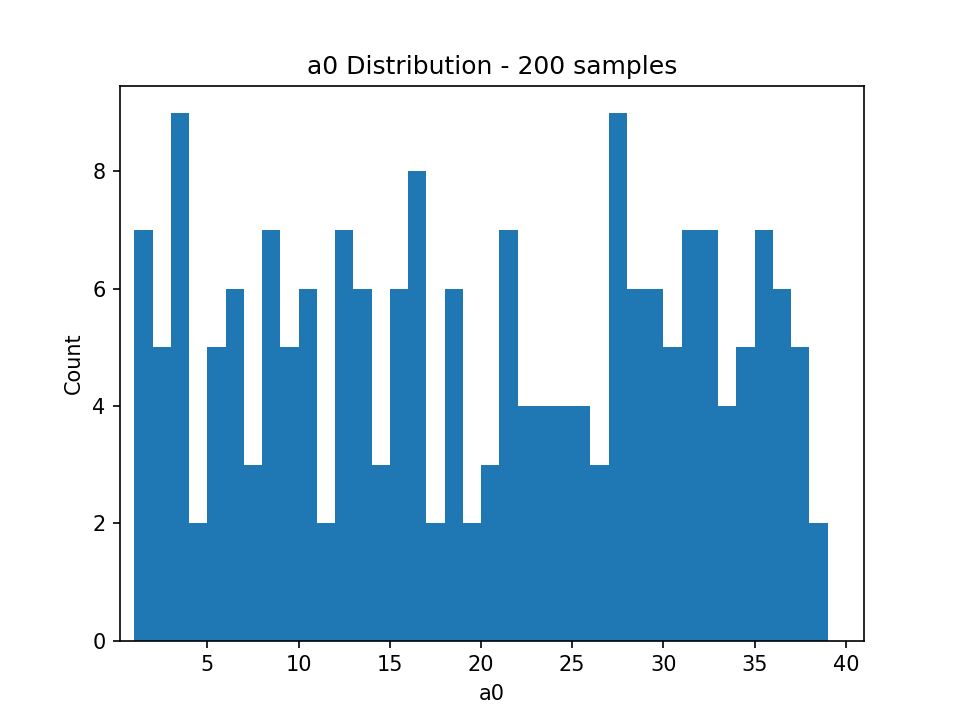

In [22]:
bins = np.arange(0, 40, 1)
plt.figure(dpi=150)
plt.xlim([min(data[:, 10]) - 1, max(data[:, 10]) + 1])

plt.hist(data[:, 10], bins=bins)
plt.title("a0 Distribution - " + str(len(data)) + " samples")
plt.xlabel("a0")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>


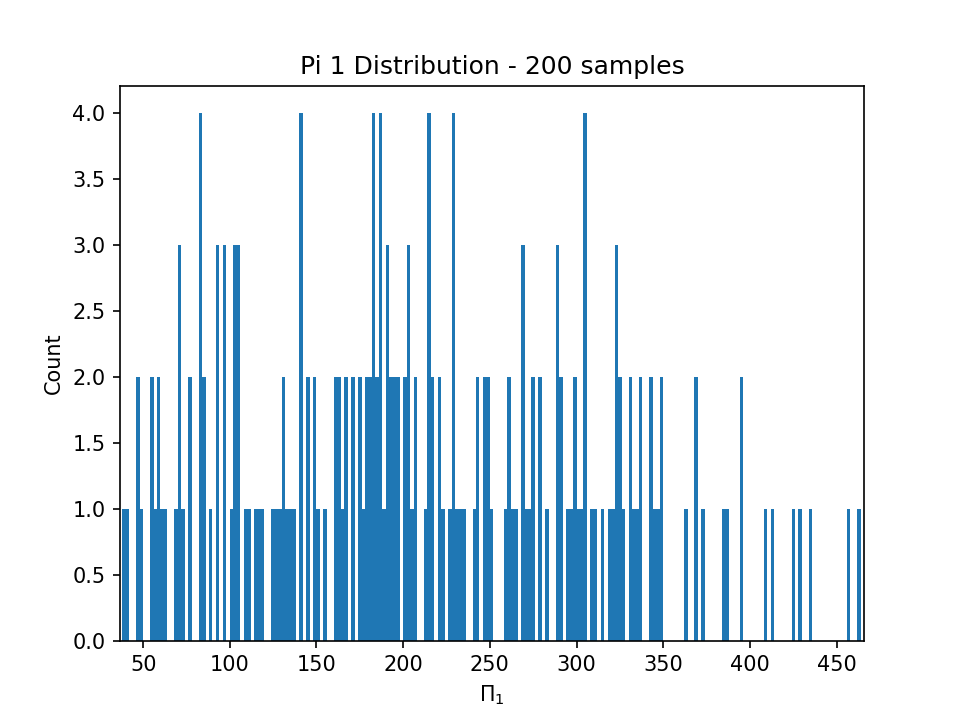

In [23]:
bin_width = 2
bins = np.arange(20, 550, bin_width)
plt.figure(dpi=150)
plt.xlim([min(data[:, 7]) - bin_width, max(data[:, 7]) + bin_width])

plt.hist(data[:, 7], bins=bins)
plt.title("Pi 1 Distribution - " + str(len(data)) + " samples")
plt.xlabel("$\Pi_1$")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>


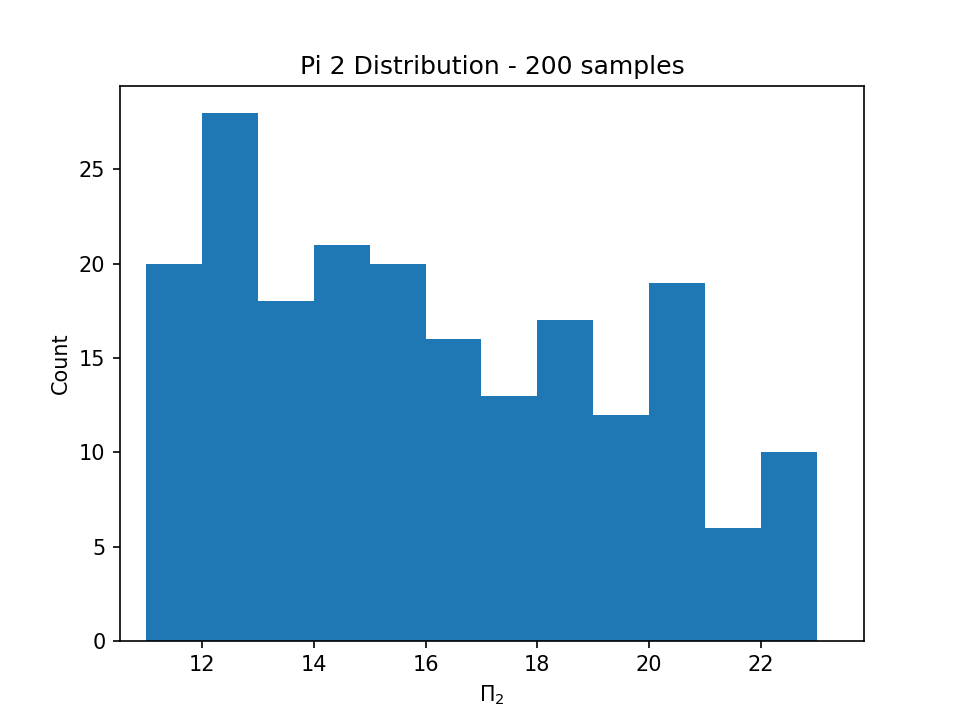

In [24]:
bin_width = 1
bins = np.arange(10, 250, bin_width)
plt.figure(dpi=150)
plt.xlim([min(data[:, 8]) - bin_width, max(data[:, 8]) + bin_width])

plt.hist(data[:, 8], bins=bins)
plt.title("Pi 2 Distribution - " + str(len(data)) + " samples")
plt.xlabel("$\Pi_2$")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>


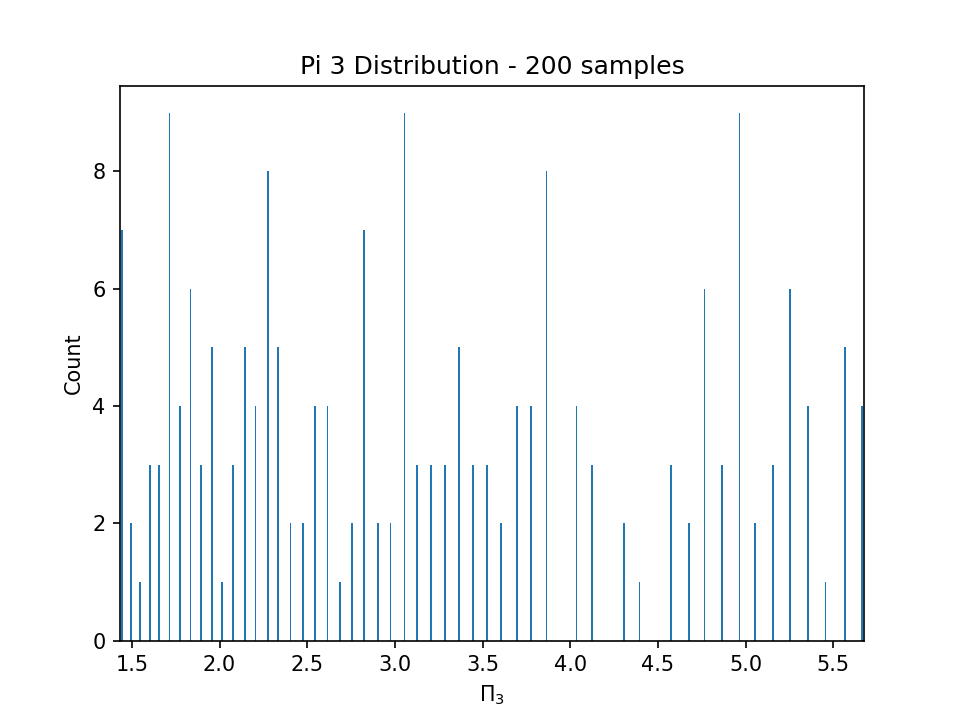

In [25]:
bin_width = 0.01
bins = np.arange(1, 6, bin_width)
plt.figure(dpi=150)
plt.xlim([min(data[:, 9]) - bin_width, max(data[:, 9]) + bin_width])

plt.hist(data[:, 9], bins=bins)
plt.title("Pi 3 Distribution - " + str(len(data)) + " samples")
plt.xlabel("$\Pi_3$")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>


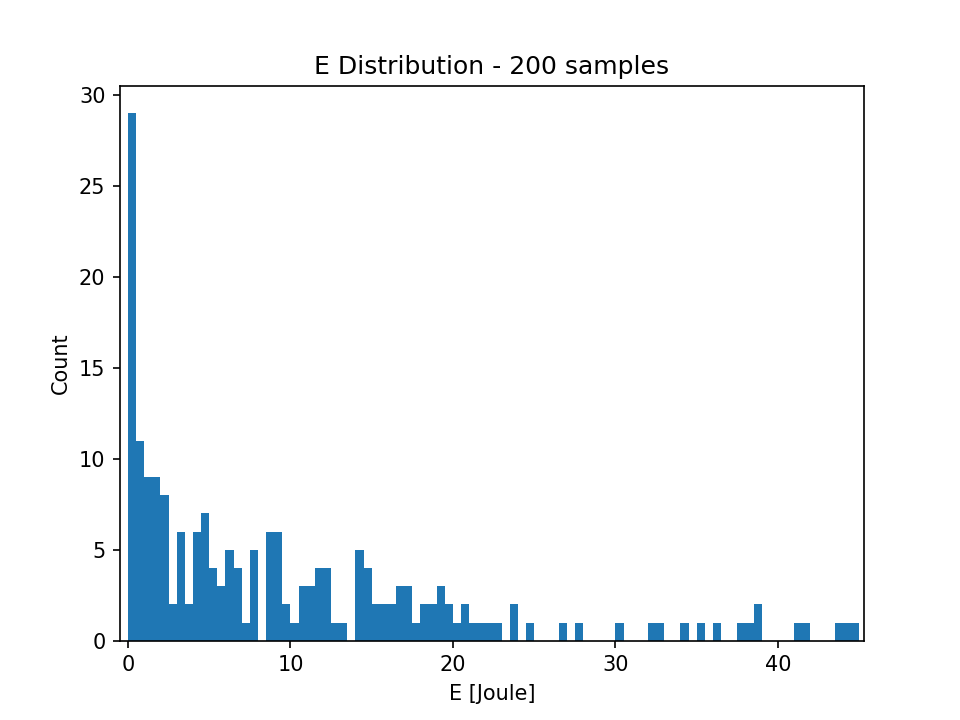

In [26]:
bin_width = 0.5
bins = np.arange(0, 50, bin_width)
plt.figure(dpi=150)
plt.xlim([min(data[:, 0]) - bin_width, max(data[:, 0]) + bin_width])

plt.hist(data[:, 0], bins=bins)
plt.title("E Distribution - " + str(len(data)) + " samples")
plt.xlabel("E [Joule]")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>


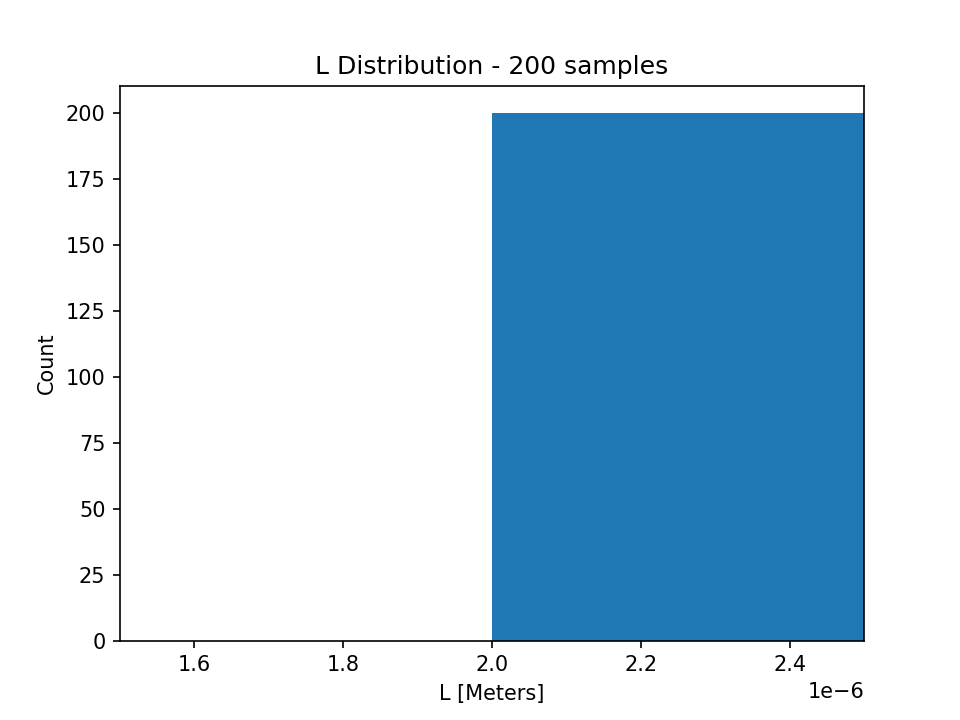

In [27]:
bin_width = 0.5e-6
bins = np.arange(0, 20e-6, bin_width)
plt.figure(dpi=150)
plt.xlim([min(data[:, 1]) - bin_width, max(data[:, 1]) + bin_width])

plt.hist(data[:, 1], bins=bins)
plt.title("L Distribution - " + str(len(data)) + " samples")
plt.xlabel("L [Meters]")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>


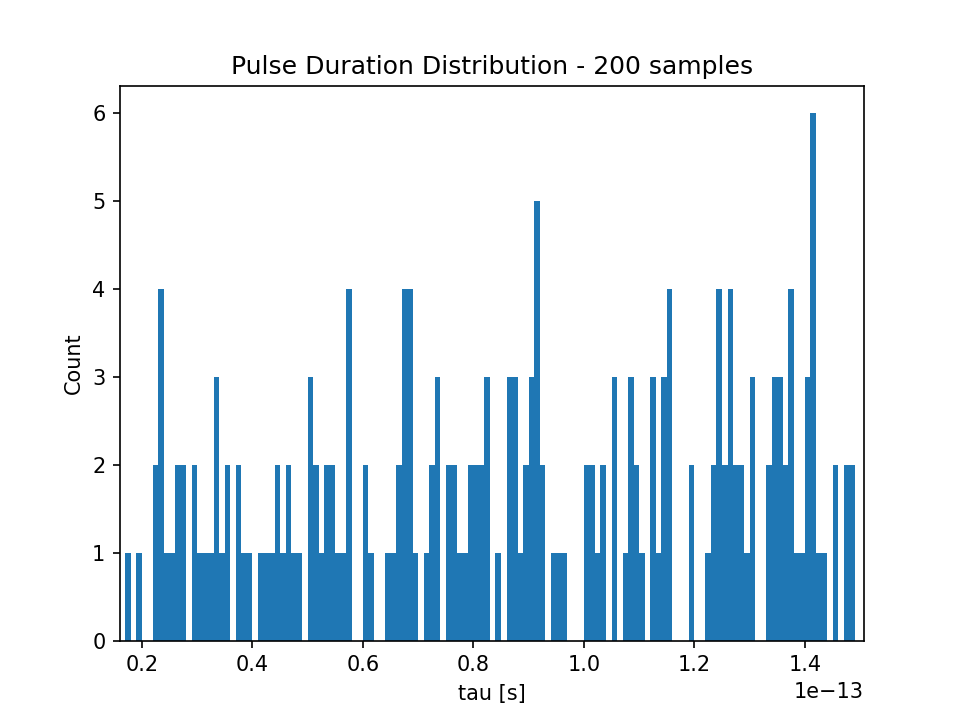

In [28]:
bin_width = 1e-15
bins = np.arange(0, 150e-15, bin_width)
plt.figure(dpi=150)
plt.xlim([min(data[:, 2]) - bin_width, max(data[:, 2]) + bin_width])

plt.hist(data[:, 2], bins=bins)
plt.title("Pulse Duration Distribution - " + str(len(data)) + " samples")
plt.xlabel("tau [s]")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>


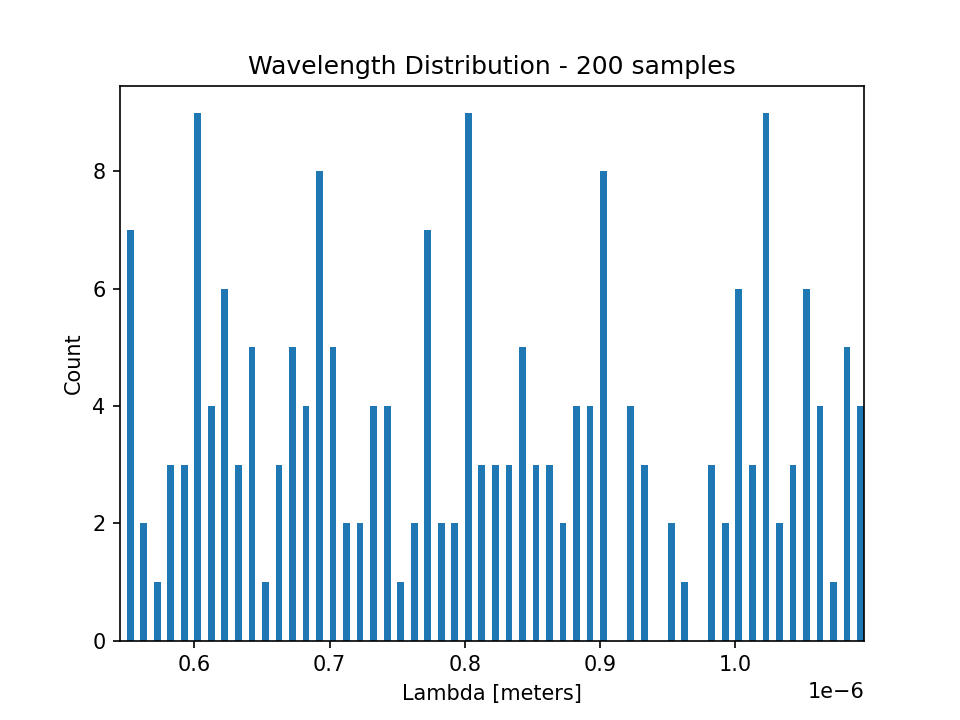

In [29]:
bin_width = 5e-9
bins = np.arange(500e-9, 1200e-9, bin_width)
plt.figure(dpi=150)
plt.xlim([min(data[:, 5]) - bin_width, max(data[:, 5]) + bin_width])

plt.hist(data[:, 5], bins=bins)
plt.title("Wavelength Distribution - " + str(len(data)) + " samples")
plt.xlabel("Lambda [meters]")
plt.ylabel("Count")
plt.show()